# Introduction

Hey, thanks for viewing my Kernel!

If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! 😊

The objective of this notebook is to prepare the data for predictions. 

# Prepare Train_Test Data

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/test.csv')

train_y = train['target']
train_data = train.drop(columns=['id', 'target'])
test_data = test.drop(columns=['id'])

train_rows_len = train_data.shape[0]

train_test_data = pd.concat([train_data, test_data])

print(train_data.shape)
print(test_data.shape)
print(train_test_data.shape)

(300000, 30)
(200000, 30)
(500000, 30)


# Plot Target Data

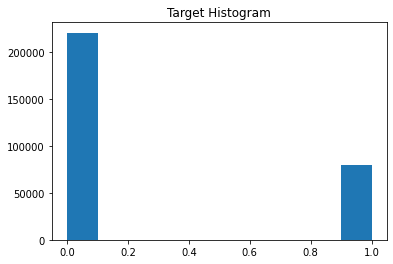

In [2]:
import matplotlib.pyplot as plt

plt.hist(train_y)
plt.title("Target Histogram")
plt.show()

# Split Numerical and Categorical

In [3]:
data_categorical_pd  = train_test_data.loc[:,train_test_data.dtypes==np.object]
data_numerical_pd  = train_test_data.loc[:,train_test_data.dtypes!=np.object]
print('data_categorical_pd.shape: ', data_categorical_pd.shape)
print('data_numerical_pd.shape: ', data_numerical_pd.shape)

data_categorical_pd.shape:  (500000, 19)
data_numerical_pd.shape:  (500000, 11)


# Data cleaning - Dealing with null values

In [4]:
categorical_missing_val_count = (data_categorical_pd.isnull().sum())
numerical_missing_val_count = (data_numerical_pd.isnull().sum())

print('categorical_missing_val_count')
print(categorical_missing_val_count[categorical_missing_val_count > 0])
print('numerical_missing_val_count')
print(numerical_missing_val_count[numerical_missing_val_count > 0])

categorical_missing_val_count
Series([], dtype: int64)
numerical_missing_val_count
Series([], dtype: int64)


# Data cleaning - Dealing with outliers

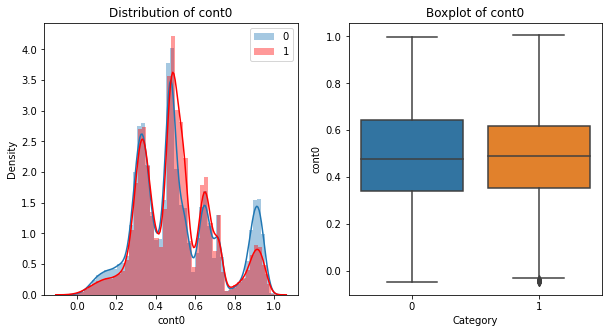

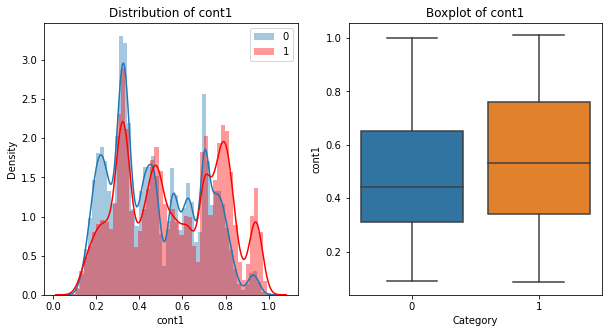

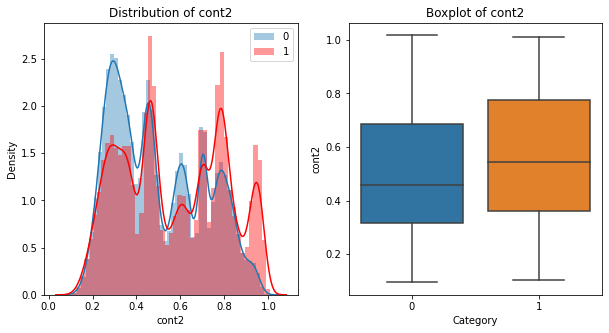

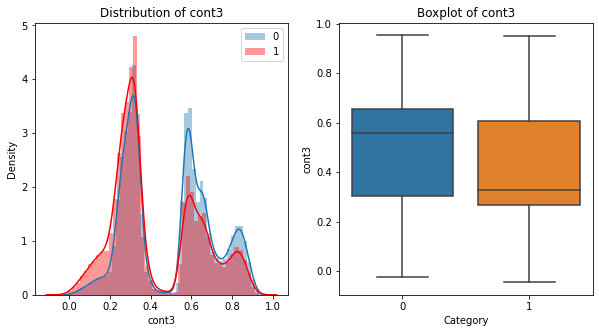

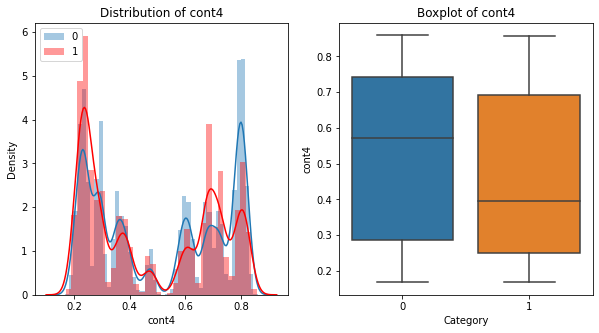

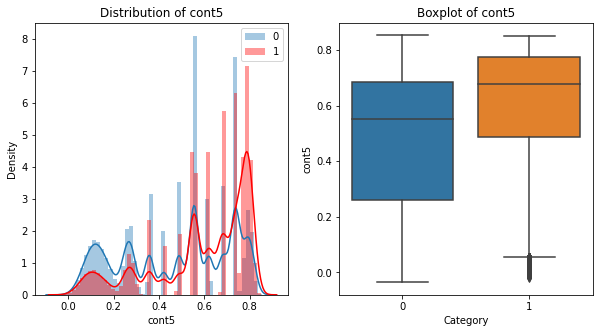

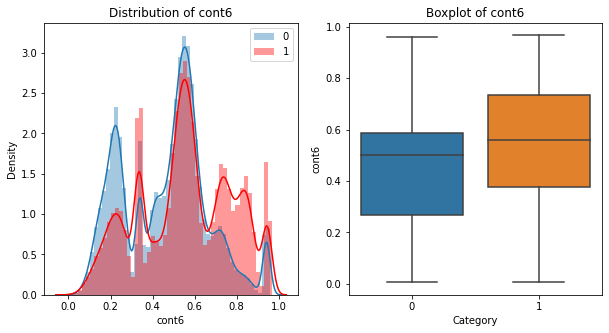

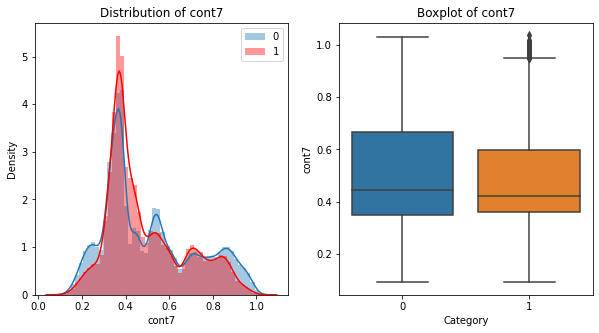

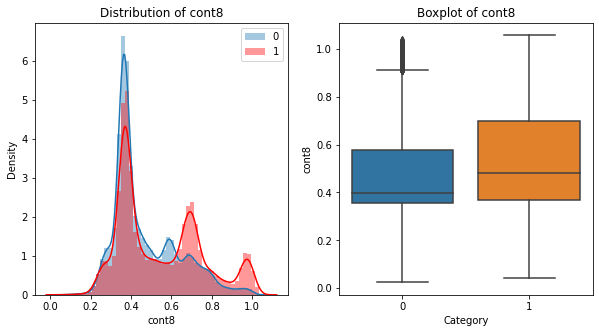

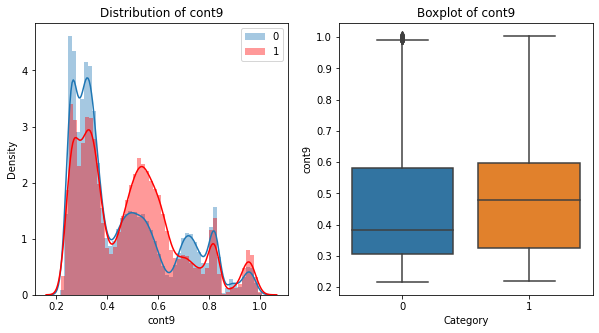

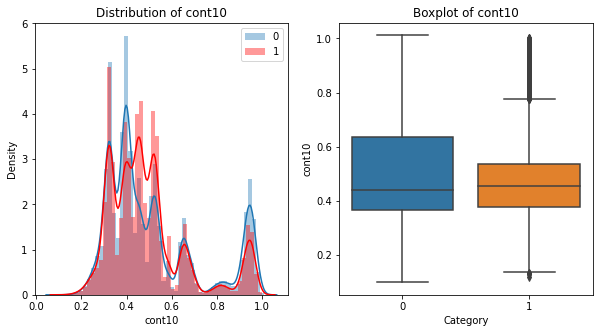

In [5]:
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

# Numerical
y_plot = train_y.copy()
y_plot.columns = ['target']
Data_plot = pd.concat([data_numerical_pd[:][:len(y_plot)], y_plot], axis=1)

for feature in data_numerical_pd.columns:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    plot10 = sns.distplot(Data_plot[Data_plot['target']==0][feature],ax=ax1, label='0')
    sns.distplot(Data_plot[Data_plot['target']==1][feature],ax=ax1,color='red', label='1')
    plot10.axes.legend()
    ax1.set_title('Distribution of {name}'.format(name=feature))

    sns.boxplot(x='target',y=feature,data=Data_plot,ax=ax2)
    ax2.set_xlabel('Category') 
    ax2.set_title('Boxplot of {name}'.format(name=feature))

    fig.show()

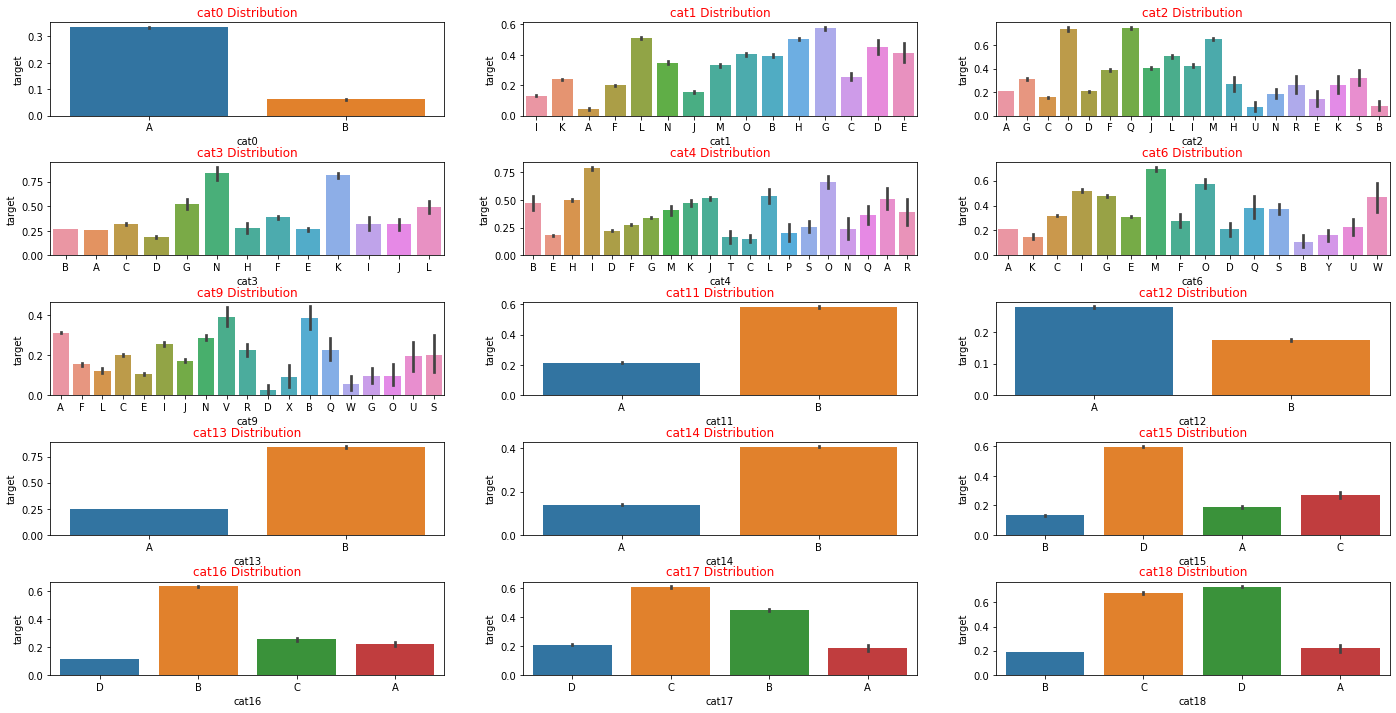

In [6]:
data_plot = pd.concat([data_categorical_pd[:][:len(y_plot)], y_plot], axis=1)
feature_list = []
for col in data_categorical_pd.columns:
    if len(data_categorical_pd[col].unique()) <= 20:
        feature_list.append(col)

n_cols = 3
nrows = round(len(feature_list) / n_cols)
fig, axes = plt.subplots(nrows, n_cols, figsize=(24, 12))
plt.subplots_adjust(hspace=0.5)

index = 0
for row in range(nrows):
    for col in range(n_cols):
        feature = feature_list[index]
        
        sns.barplot(x=feature, y='target', data=data_plot, ax=axes[row][col])
        axes[row][col].set_title(feature + ' Distribution', color = 'red')
        
        index += 1
plt.show()

# Data cleaning - Label encoding, Drop Constant

In [7]:
from sklearn.model_selection import train_test_split

object_cols = data_categorical_pd.columns
X_train, X_valid, y_train, y_valid = train_test_split(data_categorical_pd[:][:len(train_y)], train_y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))

print('good_label_cols: ', len(good_label_cols))
print(good_label_cols)
print('bad_label_cols: ', len(bad_label_cols))
print(bad_label_cols)

good_label_cols:  18
['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']
bad_label_cols:  1
['cat10']


In [8]:
th = 100

cat10_counts = data_categorical_pd['cat10'].value_counts()
cat10_cut_values = cat10_counts[cat10_counts > th].index
print('cat10_cut_values: ', len(cat10_cut_values))

cat10_cut_values_list = []
for value in data_categorical_pd['cat10']:
    if value in cat10_cut_values:
        cat10_cut_values_list.append(value)
    else:
        cat10_cut_values_list.append('others')

data_categorical_temp_pd = data_categorical_pd.copy()
data_categorical_temp_pd['cat10'] = cat10_cut_values_list

object_cols = data_categorical_temp_pd.columns
X_train, X_valid, y_train, y_valid = train_test_split(data_categorical_temp_pd[:][:len(train_y)], train_y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

print('cat10: ', set(X_train['cat10']) == set(X_valid['cat10']))

cat10_cut_values:  186
cat10:  True


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data_categorical_encoded_pd = data_categorical_temp_pd.copy()
for feature in data_categorical_encoded_pd.columns:
        le = LabelEncoder()
        data_categorical_encoded_pd[feature] = le.fit_transform(data_categorical_temp_pd[feature].astype(str))
        
print(data_categorical_encoded_pd.info())
print(data_numerical_pd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   cat0    500000 non-null  int64
 1   cat1    500000 non-null  int64
 2   cat2    500000 non-null  int64
 3   cat3    500000 non-null  int64
 4   cat4    500000 non-null  int64
 5   cat5    500000 non-null  int64
 6   cat6    500000 non-null  int64
 7   cat7    500000 non-null  int64
 8   cat8    500000 non-null  int64
 9   cat9    500000 non-null  int64
 10  cat10   500000 non-null  int64
 11  cat11   500000 non-null  int64
 12  cat12   500000 non-null  int64
 13  cat13   500000 non-null  int64
 14  cat14   500000 non-null  int64
 15  cat15   500000 non-null  int64
 16  cat16   500000 non-null  int64
 17  cat17   500000 non-null  int64
 18  cat18   500000 non-null  int64
dtypes: int64(19)
memory usage: 76.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 199999
Data colum

# Feature Engineering

In [10]:
for feature in data_categorical_encoded_pd.columns:
    value = len(data_categorical_encoded_pd[feature].unique())
    print(feature, value)

same_len_19 = ['cat9', 'cat2']
same_len_4 = ['cat15', 'cat16', 'cat17', 'cat18']
same_len_2 = ['cat0', 'cat11', 'cat12', 'cat13', 'cat14']

cat0 2
cat1 15
cat2 19
cat3 13
cat4 20
cat5 84
cat6 16
cat7 51
cat8 61
cat9 19
cat10 187
cat11 2
cat12 2
cat13 2
cat14 2
cat15 4
cat16 4
cat17 4
cat18 4


In [11]:
data_categorical_FeaEng_pd = data_categorical_encoded_pd.copy()
data_numerical_FeaEng_pd = data_numerical_pd.copy()

data_categorical_FeaEng_pd['cat9cat2T'] = data_categorical_encoded_pd['cat9'] + data_categorical_encoded_pd['cat2']
data_categorical_FeaEng_pd['cat9cat2M'] = data_categorical_encoded_pd['cat9'] * data_categorical_encoded_pd['cat2']

data_categorical_FeaEng_pd['cat15cat16T'] = data_categorical_encoded_pd['cat15'] + data_categorical_encoded_pd['cat16']
data_categorical_FeaEng_pd['cat15cat17T'] = data_categorical_encoded_pd['cat15'] + data_categorical_encoded_pd['cat17']
data_categorical_FeaEng_pd['cat15cat18T'] = data_categorical_encoded_pd['cat15'] + data_categorical_encoded_pd['cat18']
data_categorical_FeaEng_pd['cat16cat17T'] = data_categorical_encoded_pd['cat16'] + data_categorical_encoded_pd['cat17']
data_categorical_FeaEng_pd['cat16cat18T'] = data_categorical_encoded_pd['cat16'] + data_categorical_encoded_pd['cat18']
data_categorical_FeaEng_pd['cat17cat18T'] = data_categorical_encoded_pd['cat17'] + data_categorical_encoded_pd['cat18']
data_categorical_FeaEng_pd['cat15cat16M'] = data_categorical_encoded_pd['cat15'] * data_categorical_encoded_pd['cat16']
data_categorical_FeaEng_pd['cat15cat17M'] = data_categorical_encoded_pd['cat15'] * data_categorical_encoded_pd['cat17']
data_categorical_FeaEng_pd['cat15cat18M'] = data_categorical_encoded_pd['cat15'] * data_categorical_encoded_pd['cat18']
data_categorical_FeaEng_pd['cat16cat17M'] = data_categorical_encoded_pd['cat16'] * data_categorical_encoded_pd['cat17']
data_categorical_FeaEng_pd['cat16cat18M'] = data_categorical_encoded_pd['cat16'] * data_categorical_encoded_pd['cat18']
data_categorical_FeaEng_pd['cat17cat18M'] = data_categorical_encoded_pd['cat17'] * data_categorical_encoded_pd['cat18']

data_categorical_FeaEng_pd['cat0cat11T'] = data_categorical_encoded_pd['cat0'] + data_categorical_encoded_pd['cat11']
data_categorical_FeaEng_pd['cat0cat12T'] = data_categorical_encoded_pd['cat0'] + data_categorical_encoded_pd['cat12']
data_categorical_FeaEng_pd['cat0cat13T'] = data_categorical_encoded_pd['cat0'] + data_categorical_encoded_pd['cat13']
data_categorical_FeaEng_pd['cat0cat14T'] = data_categorical_encoded_pd['cat0'] + data_categorical_encoded_pd['cat14']
data_categorical_FeaEng_pd['cat11cat12T'] = data_categorical_encoded_pd['cat11'] + data_categorical_encoded_pd['cat12']
data_categorical_FeaEng_pd['cat11cat13T'] = data_categorical_encoded_pd['cat11'] + data_categorical_encoded_pd['cat13']
data_categorical_FeaEng_pd['cat11cat14T'] = data_categorical_encoded_pd['cat11'] + data_categorical_encoded_pd['cat14']
data_categorical_FeaEng_pd['cat12cat13T'] = data_categorical_encoded_pd['cat12'] + data_categorical_encoded_pd['cat13']
data_categorical_FeaEng_pd['cat12cat14T'] = data_categorical_encoded_pd['cat12'] + data_categorical_encoded_pd['cat14']
data_categorical_FeaEng_pd['cat13cat14T'] = data_categorical_encoded_pd['cat13'] + data_categorical_encoded_pd['cat14']
data_categorical_FeaEng_pd['cat0cat11M'] = data_categorical_encoded_pd['cat0'] * data_categorical_encoded_pd['cat11']
data_categorical_FeaEng_pd['cat0cat12M'] = data_categorical_encoded_pd['cat0'] * data_categorical_encoded_pd['cat12']
data_categorical_FeaEng_pd['cat0cat13M'] = data_categorical_encoded_pd['cat0'] * data_categorical_encoded_pd['cat13']
data_categorical_FeaEng_pd['cat0cat14M'] = data_categorical_encoded_pd['cat0'] * data_categorical_encoded_pd['cat14']
data_categorical_FeaEng_pd['cat11cat12M'] = data_categorical_encoded_pd['cat11'] * data_categorical_encoded_pd['cat12']
data_categorical_FeaEng_pd['cat11cat13M'] = data_categorical_encoded_pd['cat11'] * data_categorical_encoded_pd['cat13']
data_categorical_FeaEng_pd['cat11cat14M'] = data_categorical_encoded_pd['cat11'] * data_categorical_encoded_pd['cat14']
data_categorical_FeaEng_pd['cat12cat13M'] = data_categorical_encoded_pd['cat12'] * data_categorical_encoded_pd['cat13']
data_categorical_FeaEng_pd['cat12cat14M'] = data_categorical_encoded_pd['cat12'] * data_categorical_encoded_pd['cat14']
data_categorical_FeaEng_pd['cat13cat14M'] = data_categorical_encoded_pd['cat13'] * data_categorical_encoded_pd['cat14']

In [12]:
data_categorical_FeaEng_pd['cat15_16TotalTotal'] = (data_categorical_FeaEng_pd['cat15cat16T'] + data_categorical_FeaEng_pd['cat15cat17T'] +
                                                    data_categorical_FeaEng_pd['cat15cat18T'] + data_categorical_FeaEng_pd['cat16cat17T'] + 
                                                    data_categorical_FeaEng_pd['cat16cat18T'] + data_categorical_FeaEng_pd['cat17cat18T'])
data_categorical_FeaEng_pd['cat15_16MulTotal'] = (data_categorical_FeaEng_pd['cat15cat16M'] + data_categorical_FeaEng_pd['cat15cat17M'] +
                                                    data_categorical_FeaEng_pd['cat15cat18M'] + data_categorical_FeaEng_pd['cat16cat17M'] + 
                                                    data_categorical_FeaEng_pd['cat16cat18M'] + data_categorical_FeaEng_pd['cat17cat18M'])

data_categorical_FeaEng_pd['cat11_14TotalTotal'] = (data_categorical_FeaEng_pd['cat0cat11T'] + data_categorical_FeaEng_pd['cat0cat12T'] +
                                                   data_categorical_FeaEng_pd['cat0cat13T'] + data_categorical_FeaEng_pd['cat0cat14T'] +
                                                   data_categorical_FeaEng_pd['cat11cat12T'] + data_categorical_FeaEng_pd['cat11cat13T'] +
                                                   data_categorical_FeaEng_pd['cat11cat14T'] + data_categorical_FeaEng_pd['cat12cat13T'] +
                                                   data_categorical_FeaEng_pd['cat12cat14T'] + data_categorical_FeaEng_pd['cat13cat14T'])
data_categorical_FeaEng_pd['cat11_14MulTotal'] = (data_categorical_FeaEng_pd['cat0cat11M'] + data_categorical_FeaEng_pd['cat0cat12M'] +
                                                   data_categorical_FeaEng_pd['cat0cat13M'] + data_categorical_FeaEng_pd['cat0cat14M'] +
                                                   data_categorical_FeaEng_pd['cat11cat12M'] + data_categorical_FeaEng_pd['cat11cat13M'] +
                                                   data_categorical_FeaEng_pd['cat11cat14M'] + data_categorical_FeaEng_pd['cat12cat13M'] +
                                                   data_categorical_FeaEng_pd['cat12cat14M'] + data_categorical_FeaEng_pd['cat13cat14M'])

# Feature Transformation

In [13]:
from sklearn import preprocessing

data_numerical_norm_pd = data_numerical_FeaEng_pd.copy()
data_categorical_norm_pd = data_categorical_FeaEng_pd.copy()

for index, feature in enumerate(data_numerical_FeaEng_pd.columns):
    min_max_scaler = preprocessing.MinMaxScaler()
    
    norm_list = min_max_scaler.fit_transform(
        data_numerical_FeaEng_pd[data_numerical_FeaEng_pd.columns[index:index+1]])
    
    data_numerical_norm_pd[feature] = norm_list + 1

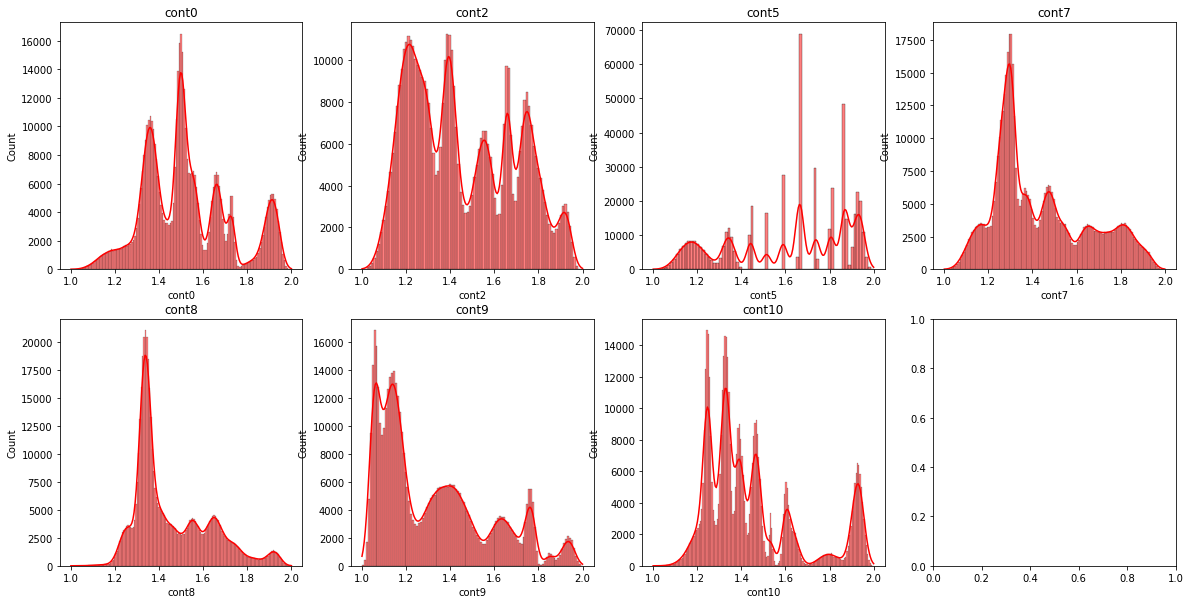

In [14]:
from scipy.stats import skew, boxcox
import seaborn as sns

data_numerical_TR_pd = data_numerical_norm_pd.copy()
data_categorical_TR_pd = data_categorical_norm_pd.copy()

skew_feature_list = []
for feature in data_numerical_norm_pd.columns:
    skew_value = skew(data_numerical_norm_pd[feature])
    if abs(skew_value) > 0.3:
        _, fitted_lambda = boxcox(data_numerical_norm_pd[feature])
        data_numerical_TR_pd[feature] = data_numerical_norm_pd[feature] ** fitted_lambda
        skew_feature_list.append(feature)
        
n_rows = round(data_numerical_TR_pd.shape[1] / 4)
n_rows = n_rows - 1
fig, axs = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 10))
index = 0
for i in range(n_rows):
    for j in range(4):
        try:
            sns.histplot(data_numerical_norm_pd[skew_feature_list[index]], kde = True, color = 'red', stat = 'count', ax=axs[i][j])
            axs[i][j].title.set_text(skew_feature_list[index])
        except:
            break
        index = index + 1
plt.show()

# Preparation Data For Training

In [15]:
X_train = pd.concat([data_numerical_TR_pd[:][:train_rows_len], data_categorical_TR_pd[:][:train_rows_len]], axis=1)
X_test = pd.concat([data_numerical_TR_pd[:][train_rows_len:], data_categorical_TR_pd[:][train_rows_len:]], axis=1)
y_train = train_y.copy()

X_train.to_csv('x_train.csv',index=False)
X_test.to_csv('x_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print(X_train.head())

X_train shape:  (300000, 68)
X_test shape:  (200000, 68)
y_train shape:  (300000,)
      cont0     cont1     cont2     cont3     cont4     cont5     cont6  \
0  0.771882  1.831469  0.757355  1.831778  1.734982  3.604858  1.614927   
1  0.839769  1.263666  0.868692  1.580342  1.315982  2.338179  1.623011   
2  0.803225  1.257000  0.884926  1.654517  1.894852  3.244596  1.367991   
3  0.709523  1.672173  0.740416  1.843903  1.903929  3.591256  1.233940   
4  0.876465  1.204973  0.886647  1.319137  1.632942  1.481867  1.601123   

      cont7     cont8     cont9  ...  cat11cat12M  cat11cat13M  cat11cat14M  \
0  0.417356  0.158744  0.256644  ...            0            0            0   
1  0.633500  0.362071  0.269906  ...            0            0            0   
2  0.649517  0.351679  0.825885  ...            0            0            0   
3  0.378396  0.221788  0.343216  ...            0            0            0   
4  0.751206  0.404528  0.713877  ...            0            0         